In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

In [32]:
df=pd.read_csv('../data/customer_churn_dataset.csv')

In [33]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# K-means Clustering

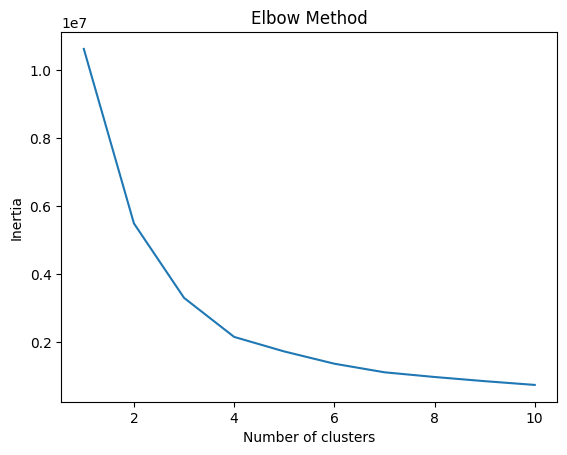

In [9]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df[['tenure', 'MonthlyCharges']])  # Example with 2 features
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [10]:
# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)  # Assume 3 clusters from the elbow method
df['Cluster'] = kmeans.fit_predict(df[['tenure', 'MonthlyCharges']])

# Add the cluster labels to the dataset
print(df[[ 'tenure', 'MonthlyCharges', 'Cluster']].head())

   tenure  MonthlyCharges  Cluster
0       1           29.85        3
1      34           56.95        0
2       2           53.85        3
3      45           42.30        0
4       2           70.70        2


In [11]:
df['Cluster'].value_counts()

Cluster
2    2191
1    1959
3    1740
0    1153
Name: count, dtype: int64

# Visualizing all the clusters.


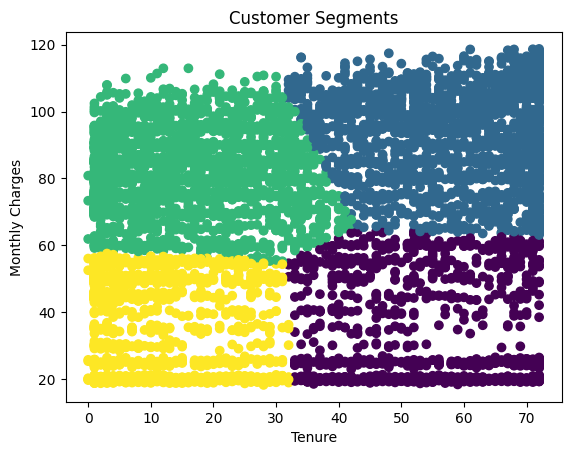

In [12]:
# Visualizing clusters
plt.scatter(df['tenure'], df['MonthlyCharges'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.title('Customer Segments')
plt.show()


   tenure  MonthlyCharges  Cluster
0       1           29.85        3
1      34           56.95        0
2       2           53.85        0
3      45           42.30        5
4       2           70.70        2


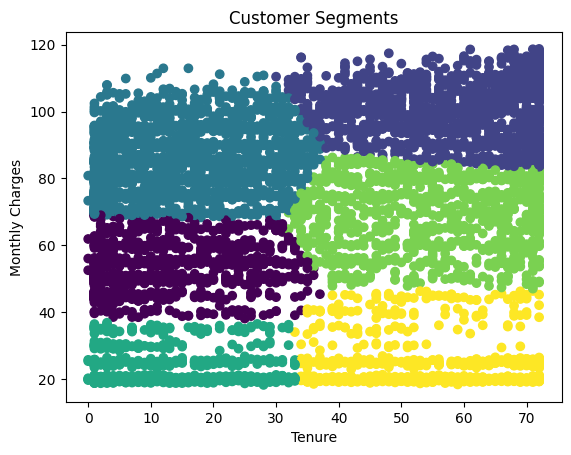

In [13]:
# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=6, random_state=42)  # Assume 3 clusters from the elbow method
df['Cluster'] = kmeans.fit_predict(df[['tenure', 'MonthlyCharges']])

# Add the cluster labels to the dataset
print(df[[ 'tenure', 'MonthlyCharges', 'Cluster']].head())

# Visualizing clusters
plt.scatter(df['tenure'], df['MonthlyCharges'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.title('Customer Segments')
plt.show()


In [14]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn', 'Cluster'],
      dtype='object')

In [15]:
x=df[['tenure', 'MonthlyCharges']].sample(5, random_state=42)
x

,tenure,MonthlyCharges
185,1,24.80
2715,41,25.25
3825,52,19.35
1807,1,76.35
132,67,50.55


In [16]:
# Predict the cluster for new data
new_data = x  # Example: using the first 5 rows of X_test for prediction
predicted_clusters = kmeans.predict(new_data)

print(predicted_clusters)

[3 5 5 2 4]


In [17]:
X=df[['tenure', 'MonthlyCharges']]

In [18]:
sil_score = silhouette_score(X, df['Cluster'])
print(f'Silhouette Score: {sil_score:.3f}')

Silhouette Score: 0.443


In [19]:
db_index = davies_bouldin_score(X, df['Cluster'])
print(f'Davies-Bouldin Index: {db_index:.3f}')

Davies-Bouldin Index: 0.780


In [20]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=6)
df['labels'] = model.fit_predict(df[['tenure', 'MonthlyCharges']])


In [21]:
print(df[['tenure', 'MonthlyCharges', 'labels']].head())

   tenure  MonthlyCharges  labels
0       1           29.85       5
1      34           56.95       1
2       2           53.85       1
3      45           42.30       3
4       2           70.70       2


In [22]:
sil_score = silhouette_score(X, df['labels'])
print(f'Silhouette Score: {sil_score:.3f}')

Silhouette Score: 0.377


In [23]:
db_index = davies_bouldin_score(X, df['labels'])
print(f'Davies-Bouldin Index: {db_index:.3f}')

Davies-Bouldin Index: 0.937


In [24]:
# from sklearn.preprocessing import StandardScaler
# # Standardize the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Perform hierarchical clustering
# Z = linkage(X_scaled, method='ward')  # 'ward' minimizes the variance of clusters

# # Plot dendrogram
# plt.figure(figsize=(10, 7))
# dendrogram(Z, leaf_rotation=90, leaf_font_size=12, color_threshold=0.7*max(Z[:, 2]))
# plt.title('Dendrogram for Hierarchical Clustering')
# plt.xlabel('Sample Index')
# plt.ylabel('Distance')
# plt.show()

In [25]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dlabels'] = dbscan.fit_predict(df[['tenure', 'MonthlyCharges']])

In [27]:
print(df[['tenure', 'MonthlyCharges', 'dlabels']].head())

   tenure  MonthlyCharges  dlabels
0       1           29.85        0
1      34           56.95       -1
2       2           53.85       50
3      45           42.30       -1
4       2           70.70        1


In [28]:
sil_score = silhouette_score(X, df['dlabels'])
print(f'Silhouette Score: {sil_score:.3f}')

Silhouette Score: -0.316


In [29]:
db_index = davies_bouldin_score(X, df['labels'])
print(f'Davies-Bouldin Index: {db_index:.3f}')

Davies-Bouldin Index: 0.937
